In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import time

# Loading datasets

In [2]:
df1=pd.read_csv('C:/Users/hasib/Downloads/Stress+level+detection/Project Code/Data/Train Data/Train Data Zip/time_domain_features_train.csv')

In [3]:
df2=pd.read_csv('C:/Users/hasib/Downloads/Stress+level+detection/Project Code/Data/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv')

In [4]:
df3=pd.read_csv('C:/Users/hasib/Downloads/Stress+level+detection/Project Code/Data/Train Data/Train Data Zip/frequency_domain_features_train.csv')

In [5]:
result = pd.merge(df1, pd.merge(df2, df3, on='uuid'), on='uuid')

In [6]:
result.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


# Reading the dataset

In [7]:
df = result[['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF','condition']].copy()

In [8]:
unique_values = df['condition'].unique()

print(unique_values)

['no stress' 'interruption' 'time pressure']


In [9]:
df.head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF,condition
0,885.157845,15.554505,11.133333,0.533333,1009.249419,15.522603,65.018055,no stress
1,939.425371,12.964439,5.600000,0.000000,690.113275,2.108525,327.296635,interruption
2,898.186047,16.305279,13.066667,0.200000,1298.222619,13.769729,94.280910,interruption
3,881.757865,15.720468,11.800000,0.133333,1005.981659,18.181913,55.328701,no stress
4,809.625331,19.213819,20.200000,0.200000,1421.782051,48.215822,29.487873,no stress


In [10]:
replace_dict = {'no stress': '0', 'interruption': '1', 'time pressure': '2'}
df['condition'] = df['condition'].replace(replace_dict)

In [11]:
df.head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF,condition
0,885.157845,15.554505,11.133333,0.533333,1009.249419,15.522603,65.018055,0
1,939.425371,12.964439,5.600000,0.000000,690.113275,2.108525,327.296635,1
2,898.186047,16.305279,13.066667,0.200000,1298.222619,13.769729,94.280910,1
3,881.757865,15.720468,11.800000,0.133333,1005.981659,18.181913,55.328701,0
4,809.625331,19.213819,20.200000,0.200000,1421.782051,48.215822,29.487873,0


In [12]:
unique_values = df['condition'].unique()

print(unique_values)

['0' '1' '2']


In [13]:
label = ['condition']
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']

In [14]:
scaler = StandardScaler()
scaler.fit(df[features])
df[features] = scaler.transform(df[features])

In [15]:
X = df[features].values
Y = df[label].values

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 40)

In [17]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(258502, 7) (258502, 1) (110787, 7) (110787, 1)


In [18]:
Y_train = k.utils.to_categorical(Y_train)
Y_test = k.utils.to_categorical(Y_test)

# Creating Model

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(50, activation='relu',kernel_initializer = 'he_normal',input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(10, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(3, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
import tensorflow as tf

# Deprecated:
# is_eager = tf.executing_eagerly_outside_functions()

# Use the updated function:
is_eager = tf.compat.v1.executing_eagerly_outside_functions()

In [23]:
history = model.fit(X_train,Y_train, validation_data = (X_test,Y_test), epochs = 50, batch_size = 1024, verbose =1)

Epoch 1/50

253/253 [==============================] - 4s 8ms/step - loss: 0.8378 - accuracy: 0.6185 - val_loss: 0.7266 - val_accuracy: 0.6783
Epoch 2/50
253/253 [==============================] - 2s 7ms/step - loss: 0.6420 - accuracy: 0.7326 - val_loss: 0.5790 - val_accuracy: 0.7808
Epoch 3/50
253/253 [==============================] - 2s 6ms/step - loss: 0.5292 - accuracy: 0.7973 - val_loss: 0.4953 - val_accuracy: 0.8118
Epoch 4/50
253/253 [==============================] - 2s 7ms/step - loss: 0.4613 - accuracy: 0.8262 - val_loss: 0.4409 - val_accuracy: 0.8306
Epoch 5/50
253/253 [==============================] - 2s 6ms/step - loss: 0.4133 - accuracy: 0.8445 - val_loss: 0.3966 - val_accuracy: 0.8531
Epoch 6/50
253/253 [==============================] - 2s 6ms/step - loss: 0.3751 - accuracy: 0.8569 - val_loss: 0.3625 - val_accuracy: 0.8616
Epoch 7/50
253/253 [==============================] - 2s 6ms/step - loss: 0.3456 - accuracy: 0.8670 - val_loss: 0.3363 - val_accuracy: 0.8715
Epoch

<Axes: >

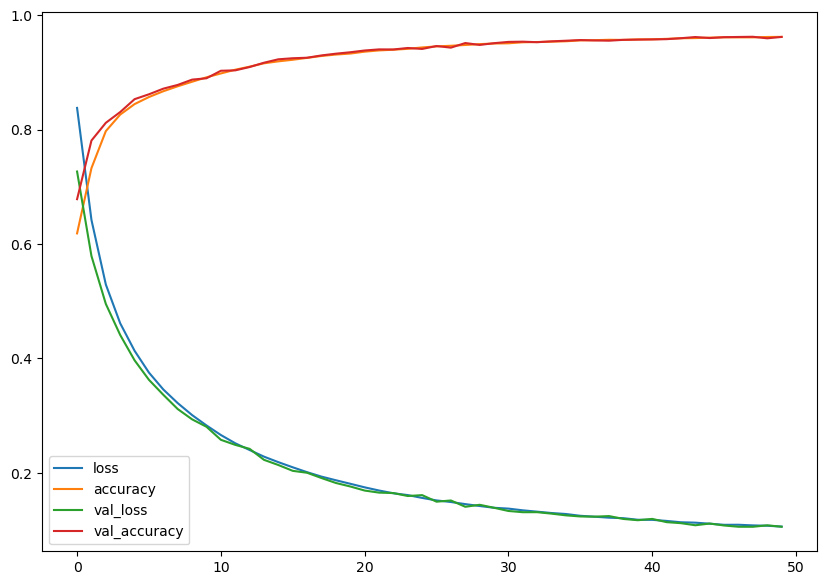

In [24]:
pd.DataFrame(history.history).plot(figsize=(10,7))

# Testing on testset

In [25]:
df_test = pd.read_csv('test.csv')

In [26]:
df_test[features] = scaler.transform(df_test[features])
df_test[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,-1.001159,-0.634891,-0.598837,-0.874583,-0.575814,0.602911,-0.295775
1,-0.024971,1.048686,1.361573,-0.672601,1.080403,-0.280746,-0.157544
2,0.897836,1.544671,1.743894,0.943254,1.965161,-0.511482,0.037412
3,-0.175046,-0.777935,-0.623241,-0.335965,-0.767443,-0.477196,-0.241658
4,-0.721825,-0.393071,-0.476820,-0.201310,-0.735541,-0.089133,-0.280126


In [27]:
X = df_test[features].values
y = df_test[label].values

In [28]:
y = k.utils.to_categorical(y)

In [29]:
loss,acc = model.evaluate(X,y,verbose=1)

1283/1283 [==============================] - 4s 3ms/step - loss: 0.1063 - accuracy: 0.9630


# Final Pipeline for prediction

In [30]:
df4=pd.read_csv('C:/Users/hasib/Downloads/Stress+level+detection/Project Code/Data/Test Data/Test Zip/frequency_domain_features_test.csv')

In [31]:
df5=pd.read_csv('C:/Users/hasib/Downloads/Stress+level+detection/Project Code/Data/Test Data/Test Zip/heart_rate_non_linear_features_test.csv')

In [32]:
df6=pd.read_csv('C:/Users/hasib/Downloads/Stress+level+detection/Project Code/Data/Test Data/Test Zip/time_domain_features_test.csv')

In [33]:
result2 = pd.merge(df4, pd.merge(df5, df6, on='uuid'), on='uuid')
data = result2[['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF','condition']].copy()

In [34]:
replace_dict = {'no stress': '0', 'interruption': '1', 'time pressure': '2'}
data['condition'] = data['condition'].replace(replace_dict)
data.head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF,condition
0,934.665288,11.801781,3.933333,0.133333,570.643114,2.993254,190.643094,2
1,817.062380,20.558810,24.600000,0.533333,1553.971621,39.694850,39.147940,0
2,876.762022,13.853737,7.066667,0.533333,655.175895,14.536877,45.069921,0
3,1038.640693,16.457194,10.800000,1.866667,592.913021,7.093235,83.588517,2
4,774.548508,10.273114,2.000000,0.066667,374.939530,33.468834,11.202647,1


In [35]:
t = scaler.transform(data[features].iloc[5545].values.reshape(1,-1))
print(t)

[[-0.14197868  1.74248065  2.22382818  0.87592707  1.63804806  0.41363877
  -0.23127176]]


C:\Users\hasib\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
y_pred = model.predict(t)

1/1 [==============================] - 0s 125ms/step


In [37]:
print(np.argmax(y_pred[0]))
print(data[label].iloc[5545])

1
condition    1
Name: 5545, dtype: object
